In [1]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

 #### Total Energies in eV

In [2]:
E0=-3324932.942491689 # pristine
E1=-3335811.376811718# addon S
E2=-3314050.981984572 # mono S vacancy
E3=-3303169.071443753 # di S vacancy up&down
E4=-3303169.047079117 # di S vacancy neighboring
E5=-3213689.419187400  # mono Mo vacancy
E_MoS2=-132997.116189474 # primtitive
ES8=-87031.629750345 
EMo=-222473.348568306 

#### Constants

In [3]:
pi=numpy.pi
convert=29979245800.0*2*pi #cm^-1 to Hz

# Calculation of $\mu_S$ on full temperature Range

In [4]:
p0=1013250  # atm to g/(cm s^2)
p=3.3108987*p0# 1.89e-3 atm (atm to cgs * 1013250))
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=4.258952992e-22 # 32.06*8 in amu changed to g
IA=1.314051643394595e-37 # g.cm^2
IB=1.314146807283309e-37
IC=2.42660958899724e-37

In [5]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VMo', sep='\s+',header=0)
dS=pd.read_csv('w', sep='\s+',header=0)
dW=pd.read_csv('x', sep='\s+',header=0)

wW=dW['x']*convert 
wS8=dS['x']*convert 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VMo']*convert #THZ to Hz

## $$\mu=   \mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

## $$  \mu_{0}=R\ln\frac{Z^{0}}{V} \frac{kT}{p_{0}} = -kT\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]- kT \ln(\frac{\pi^{\frac{1}{2}}}{\sigma}) \\ -kT \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})+kT \sum^{3N-6}_{i} \ln(1-exp(-\beta h \omega_{i})) $$

## $$ A=\ln( \frac{Z^{0}_{trans} kT}{V})=\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]= \ln [(2 \pi m )^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{h^{3} p_{0}}]$$

##  $$ B= \ln Z^{0}_{rot}=\ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})$$

## $$ C=\ln Z^{0}_{vib}= -\sum^{3N-6}_{i} \ln(1-exp(-\frac{ \hbar \omega_{i}}{kT}))$$

## $$D=\sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [6]:
D=[]
E=[]
mu_0=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
for T in range(473,1600,10):
        A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
        B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
        temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wS8])
        C=np.sum(temp)
        E.append(k*T*np.log(p/p0))
        mu_0.append(-k*T*(A+B-C)) 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wS8])
D=np.sum(temp2)
#print('D',D)
mu_S8=np.array(mu_0) + np.array(E) + D + ES8 
#print('mu_S8',mu_S8)

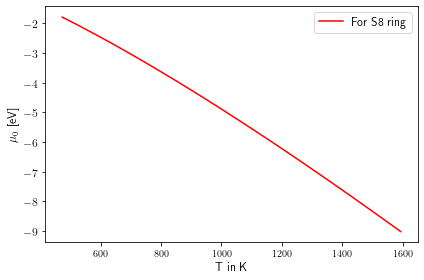

In [7]:
T=arange(473,1600,10)
plt.plot(T,mu_0, 'red', label='For S8 ring') 
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_0$ [eV]', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('mu0_T.png',dpi=400)

## $$ \mu=\mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

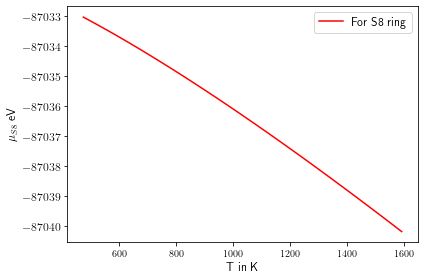

In [8]:
T=arange(473,1600,10)

plt.plot(T,mu_S8, 'red', label='For S8 ring')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

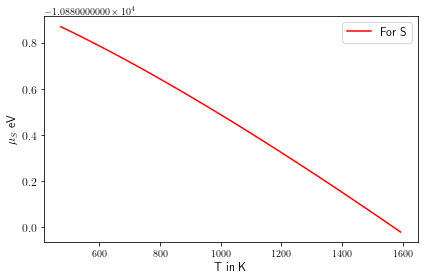

In [9]:
mu_S=mu_S8/8
plt.plot(T,mu_S, 'red', label='For S')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_T.png',dpi=400)


## Free Energy function
## $$ F^{qh}=\sum_{i}^{3N} [\frac{\hbar w_{i}}{2}+kTln[1-\exp{\frac{-
\hbar w_{i}}{kT}}]$$

In [10]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   for T in arange(473,1600,10):
      
     temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
     F.append(numpy.sum(temp3))

   return F


# Calculation of $\mu_{Mo}$ on full temperature Range

#### For Mo BCC bulk
$$ \mu_{Mo}^{BCC}=\frac{1}{2}(E_{DFT}+ PV) + \frac{1}{2} F_{phon}(V,T) $$

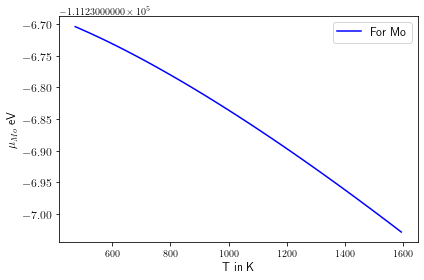

In [12]:


Fphon=free_energy(wW)
Fphon=np.array(Fphon)

V= 0.292849E+02 # volume of unitcell A^3
pp= 7.329633135876344e-05# at 2000 k
PV=pp*V*6.3242093e-07 # to eV
T=arange(473,1600,10)

mu_Mo=(1/2)*(EMo+PV+Fphon)

plt.plot(T,mu_Mo, 'blue', label='For Mo')
plt.xlabel('T in K', fontsize=12)
plt.ylabel(r'$\mu_{Mo}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muMo_T.png',dpi=400)

#### $$\Delta F^{qh}(T)=F^{qh}_{defect}-F^{qh}_{pristine} $$

In [13]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 


## Equilibirium Concentration function

In [14]:
def conc(r,g):
   rho=[]
   T=arange(473,1600,10)
   t=k*T
   for i,j in zip(r,t):
       #print('Gf is:',i, ' KT is: ', j, 'ratio is: ', i/j)
       #temp=(g/(146.78431348071518e-20))*math.exp(-i/j)
       temp=(g)*math.exp(-i/j)
       rho.append(temp)
      
   return rho  


## $$ G^{d}_{f}(P,T)=F_{defect}(P,T)-F_{pristine}(P,T)+ P\Delta V - \sum_{i} \Delta n_{i} \mu_{i} $$

In [15]:
addS = [E1-E0-a + b for a, b in zip(mu_S, DeltaF(w1,w0))]
VS = [E2-E0+a + b for a, b in zip(mu_S, DeltaF(w2,w0))]
VS2 = [E3-E0+2*a + b for a, b in zip(mu_S, DeltaF(w3,w0))]
VS22 = [E4-E0+2*a + b for a, b in zip(mu_S, DeltaF(w4,w0))]
VMo = [E5-E0+a + b for a, b in zip(mu_Mo, DeltaF(w5,w0))]
#print(mu_Mo)
#print(DeltaF(w5,w0))

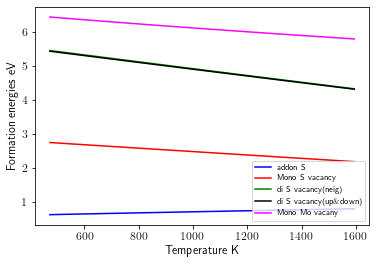

In [16]:
T=arange(473,1600,10)
plt.plot(T, addS, 'b', label='addon S')
plt.plot(T, VS, 'r', label='Mono S vacancy')
plt.plot(T, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
plt.plot(T, VMo, 'magenta', label='Mono Mo vacany') 
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
#plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.legend(loc='lower right',fontsize=8)
#plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T.png',dpi=400)
plt.show()

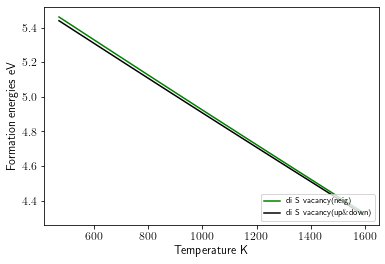

In [17]:
plt.xlabel('Temperature K', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.plot(T, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
plt.legend(loc='lower right',fontsize=8)
#plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_T_di.png',dpi=400)
plt.show()

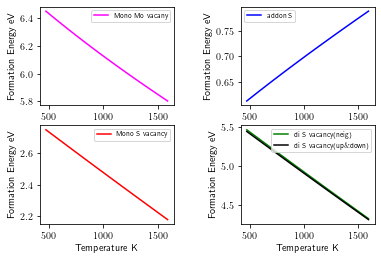

In [18]:
fig, axs = plt.subplots(2, 2)

    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)


axs[0, 0].plot(T, VMo, 'magenta', label='Mono Mo vacany')
axs[0, 0].legend(fontsize=7)
axs[0, 1].plot(T, addS, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(T, VS, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(T, VS22, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel='Formation Energy eV')


plt.savefig('Ef_2_T.png',dpi=400)    

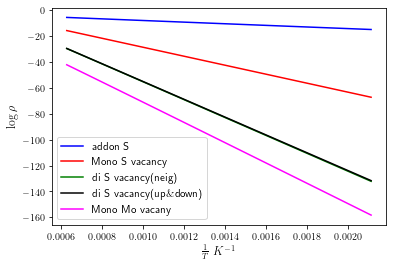

In [19]:
rho1=conc(addS,1)
rho2=conc(VS,1)
rho3=conc(VS22,6)
rho4=conc(VS2,6)
rho5=conc(VMo,1)

T=arange(473,1600,10)

plt.plot(1/T,np.log(rho1) , 'b', label='addon S')
plt.plot(1/T, np.log(rho2), 'r', label='Mono S vacancy') 
plt.plot(1/T, np.log(rho3), 'g', label='di S vacancy(neig)') 
plt.plot(1/T, np.log(rho4), 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(1/T, np.log(rho5), 'magenta', label='Mono Mo vacany') 
plt.xlabel(r'$\frac{1}{T}$ $ K^{-1}$', fontsize=12)
plt.ylabel(r'$\log\rho $', fontsize=12)
plt.legend(fontsize=11)
plt.savefig('logarithm_rho.png',dpi=400)  

plt.show()

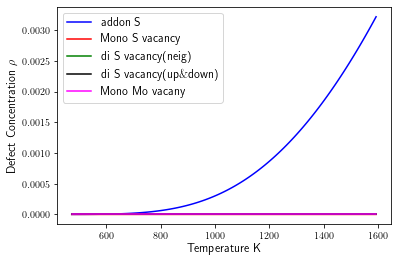

In [20]:
T=arange(473,1600,10)
plt.plot(T,rho1 , 'b', label='addon S')
plt.plot(T, rho2, 'r', label='Mono S vacancy') 
plt.plot(T, rho3, 'g', label='di S vacancy(neig)') 
plt.plot(T, rho4, 'k', label=r'di S vacancy(up$\&$down)') 
plt.plot(T, rho5, 'magenta', label='Mono Mo vacany') 

plt.xlabel('Temperature K', fontsize=12)
plt.ylabel(r'Defect Concentration $\rho$', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rho_T.png',dpi=400)

#plt.ylim(0,5e-15)
plt.show()




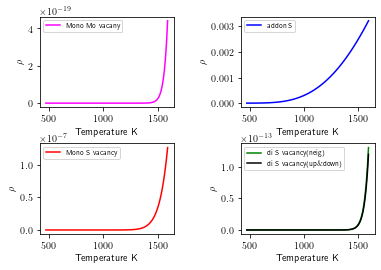

In [21]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)
axs[0, 0].plot(T, rho5, 'magenta', label='Mono Mo vacany')
#axs[0, 0].set_xlim(1000,1300)
#axs[0, 0].set_ylim(0,1e-22)
axs[0, 0].legend(fontsize=7)
axs[0, 1].plot(T, rho1, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(T, rho2, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(T, rho4, 'g', label='di S vacancy(neig)')
axs[1, 1].plot(T, rho3, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)

for ax in axs.flat:
    ax.set(xlabel='Temperature K', ylabel=r'$\rho$')


plt.savefig('rho_2_T.png',dpi=400) 